<a href="https://colab.research.google.com/github/GHM-ML/Computer-Vision-Python/blob/main/Tomato_plague_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
import tensorflow_datasets as tfds
from keras.layers.core import Dense
from keras.layers import *
from keras.losses import CategoricalCrossentropy
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
#unzip loaded folder
!unzip /Tomato.zip

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Tomato',
    labels="inferred",
    label_mode="categorical",
    image_size=(299, 299),
    shuffle=True,
    seed=133,
    validation_split=0.5,
    subset="training")

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Tomato',
    labels="inferred",
    label_mode="categorical",
    image_size=(299,299),
    shuffle=True,
    seed=133,
    validation_split=0.5,
    subset="validation")

Found 4263 files belonging to 8 classes.
Using 2132 files for training.
Found 4263 files belonging to 8 classes.
Using 2131 files for validation.


In [ ]:
fst_backbone = tf.keras.applications.ResNet50(
        weights='imagenet',
        include_top=False,
        input_shape=(299, 299,3))

for i in range (len(fst_backbone.layers)):
    fst_backbone.layers[i].trainable = False
    
fst_resnet_model = Sequential([fst_backbone, Flatten(),
                           Dense(128, activation = 'relu'),
                           Dense(8, activation = 'softmax')])
fst_resnet_model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 10, 10, 2048)      23587712  
                                                                 
 flatten (Flatten)           (None, 204800)            0         
                                                                 
 dense (Dense)               (None, 128)               26214528  
                                                                 
 dense_1 (Dense)             (None, 8)                 1032      
                                                                 
Total params: 49,803,272
Trainable params: 26,215,560
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
fst_resnet_model.compile(optimizer = Adam(learning_rate = 1e-3), loss = 'categorical_crossentropy', metrics = ['Accuracy','Precision', 'Recall'])
fst_history = fst_resnet_model.fit(
    x=train_ds,
    validation_data = test_ds,
    batch_size=32,
    epochs=20,
    shuffle=True)

Epoch 1/20
67/67 [==============================] - 73s 851ms/step - loss: 9.6656 - Accuracy: 0.5840 - precision: 0.5873 - recall: 0.5793 - val_loss: 1.2116 - val_Accuracy: 0.7593 - val_precision: 0.7722 - val_recall: 0.7541
Epoch 2/20
67/67 [==============================] - 53s 789ms/step - loss: 0.2939 - Accuracy: 0.9198 - precision: 0.9235 - recall: 0.9174 - val_loss: 1.2808 - val_Accuracy: 0.7766 - val_precision: 0.7830 - val_recall: 0.7705
Epoch 3/20
67/67 [==============================] - 53s 791ms/step - loss: 0.1671 - Accuracy: 0.9737 - precision: 0.9756 - recall: 0.9737 - val_loss: 0.9294 - val_Accuracy: 0.8470 - val_precision: 0.8538 - val_recall: 0.8442
Epoch 4/20
67/67 [==============================] - 53s 792ms/step - loss: 0.0675 - Accuracy: 0.9841 - precision: 0.9850 - recall: 0.9841 - val_loss: 0.9828 - val_Accuracy: 0.8433 - val_precision: 0.8475 - val_recall: 0.8400
Epoch 5/20
67/67 [==============================] - 53s 794ms/step - loss: 0.0202 - Accuracy: 0.9934

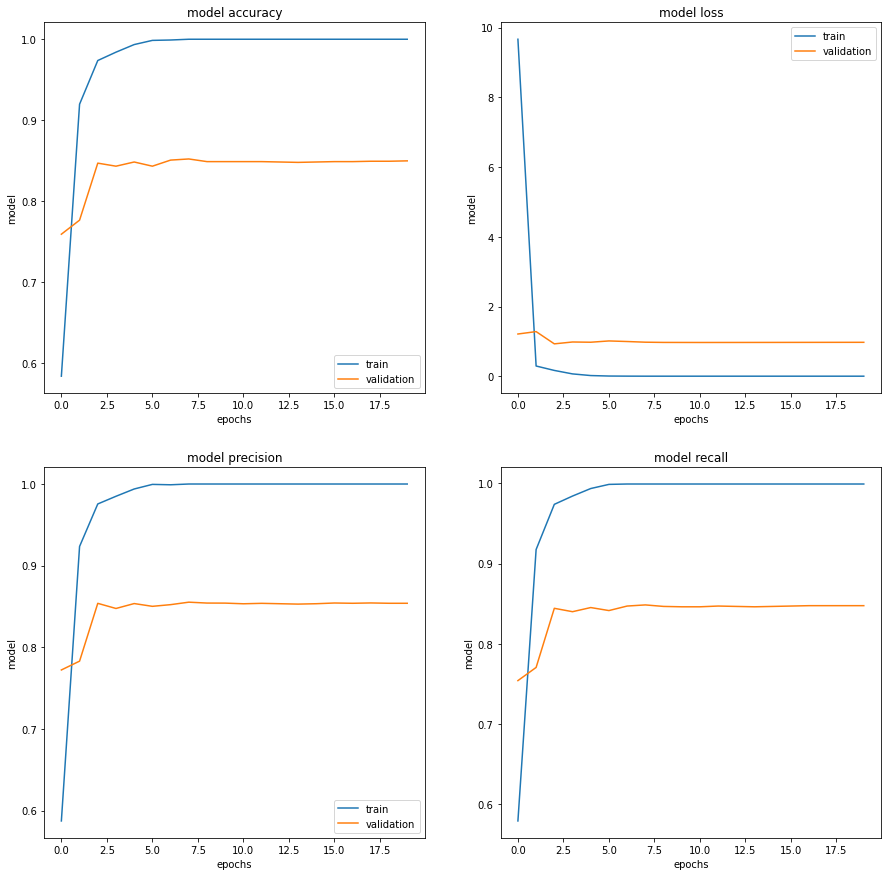

In [ ]:
fst_f, fst_axs = plt.subplots(2,2,figsize=(15,15))

fst_axs[0, 0].plot(fst_history.history['Accuracy'])
fst_axs[0, 0].plot(fst_history.history['val_Accuracy'])
fst_axs[0, 0].set_title('model accuracy')
fst_axs[0, 0].legend(['train', 'validation'])

fst_axs[0, 1].plot(fst_history.history['loss'])
fst_axs[0, 1].plot(fst_history.history['val_loss'])
fst_axs[0, 1].set_title('model loss')
fst_axs[0, 1].legend(['train', 'validation'])


fst_axs[1, 0].plot(fst_history.history['precision'])
fst_axs[1, 0].plot(fst_history.history['val_precision'])
fst_axs[1, 0].set_title('model precision')
fst_axs[1, 0].legend(['train', 'validation'])

fst_axs[1, 1].plot(fst_history.history['recall'])
fst_axs[1, 1].plot(fst_history.history['val_recall'])
fst_axs[1, 1].set_title('model recall')

for ax in fst_axs.flat:
    ax.set(xlabel='epochs', ylabel='model')

In [ ]:
secnd_backbone = tf.keras.applications.ResNet50(
        weights='imagenet',
        include_top=False,
        input_shape=(299, 299,3))

for i in range (len(secnd_backbone.layers)):
    secnd_backbone.layers[i].trainable = False
    
secnd_resnet_model = Sequential([secnd_backbone, MaxPooling2D(
    pool_size=(4, 4), strides=(2,2), padding="valid"), Flatten(),
                           Dense(128, activation = 'relu'),
                           Dense(8, activation = 'softmax')])

In [ ]:
secnd_resnet_model.summary()
secnd_resnet_model.compile(optimizer = Adam(learning_rate = 1e-3), loss = 'categorical_crossentropy', metrics = ['Accuracy','Precision', 'Recall'])
secnd_history = secnd_resnet_model.fit(
    x=train_ds,
    validation_data = test_ds,
    batch_size=32,
    epochs=20,
    shuffle=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 10, 10, 2048)      23587712  
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 2048)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               4194432   
                                                                 
 dense_3 (Dense)             (None, 8)                 1032      
                                                                 
Total params: 27,783,176
Trainable params: 4,195,464
Non-trainable params: 23,587,712
__________________________________

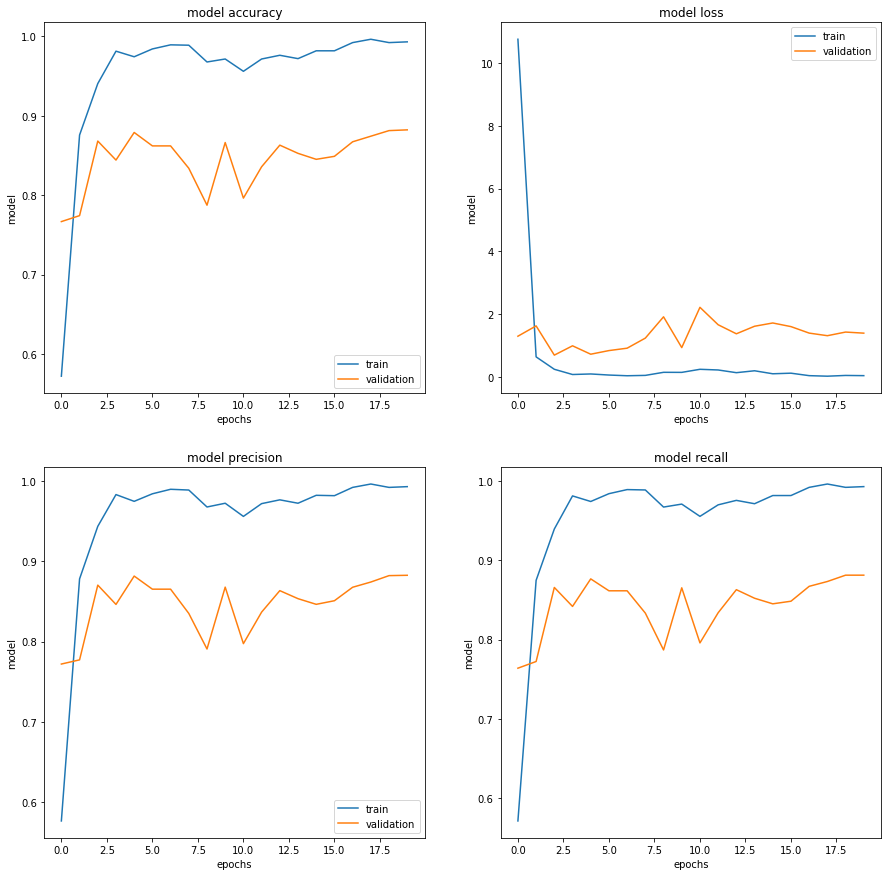

In [ ]:
secnd_f, secnd_axs = plt.subplots(2,2,figsize=(15,15))

secnd_axs[0, 0].plot(secnd_history.history['Accuracy'])
secnd_axs[0, 0].plot(secnd_history.history['val_Accuracy'])
secnd_axs[0, 0].set_title('model accuracy')
secnd_axs[0, 0].legend(['train', 'validation'])


secnd_axs[0, 1].plot(secnd_history.history['loss'])
secnd_axs[0, 1].plot(secnd_history.history['val_loss'])
secnd_axs[0, 1].set_title('model loss')
secnd_axs[0, 1].legend(['train', 'validation'])


secnd_axs[1, 0].plot(secnd_history.history['precision'])
secnd_axs[1, 0].plot(secnd_history.history['val_precision'])
secnd_axs[1, 0].set_title('model precision')
secnd_axs[1, 0].legend(['train', 'validation'])

secnd_axs[1, 1].plot(secnd_history.history['recall'])
secnd_axs[1, 1].plot(secnd_history.history['val_recall'])
secnd_axs[1, 1].set_title('model recall')

for ax in secnd_axs.flat:
    ax.set(xlabel='epochs', ylabel='model')

In [ ]:
thrd_backbone = tf.keras.applications.ResNet50(
        weights='imagenet',
        include_top=False,
        input_shape=(299, 299,3))

for i in range (len(thrd_backbone.layers)-10):
    thrd_backbone.layers[i].trainable = False
    
thrd_resnet_model = Sequential([thrd_backbone, MaxPooling2D(
    pool_size=(4, 4), strides=(2,2), padding="valid"), Flatten(),
                           Dense(128, activation = 'relu'),
                           Dense(8, activation = 'softmax')])
thrd_resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 10, 10, 2048)      23587712  
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 2048)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               4194432   
                                                                 
 dense_5 (Dense)             (None, 8)                 1032      
                                                                 
Total params: 27,783,176
Trainable params: 8,661,128
Non-trainable params: 19,122,048
__________________________________

In [ ]:
thrd_resnet_model.compile(optimizer = Adam(learning_rate = 1e-3), loss = 'categorical_crossentropy', metrics = ['Accuracy','Precision', 'Recall'])
thrd_history = thrd_resnet_model.fit(
    x=train_ds,
    validation_data = test_ds,
    batch_size=32,
    epochs=20,
    shuffle=True)

Epoch 1/20
67/67 [==============================] - 62s 851ms/step - loss: 12.0003 - Accuracy: 0.5788 - precision: 0.5858 - recall: 0.5699 - val_loss: 3.6040 - val_Accuracy: 0.3519 - val_precision: 0.3605 - val_recall: 0.3444
Epoch 2/20
67/67 [==============================] - 55s 824ms/step - loss: 0.3122 - Accuracy: 0.8968 - precision: 0.9083 - recall: 0.8874 - val_loss: 0.9797 - val_Accuracy: 0.7086 - val_precision: 0.7328 - val_recall: 0.6809
Epoch 3/20
67/67 [==============================] - 55s 816ms/step - loss: 0.0997 - Accuracy: 0.9644 - precision: 0.9697 - recall: 0.9615 - val_loss: 0.3602 - val_Accuracy: 0.8803 - val_precision: 0.8960 - val_recall: 0.8691
Epoch 4/20
67/67 [==============================] - 54s 806ms/step - loss: 0.0388 - Accuracy: 0.9887 - precision: 0.9892 - recall: 0.9883 - val_loss: 0.2748 - val_Accuracy: 0.9155 - val_precision: 0.9243 - val_recall: 0.9057
Epoch 5/20
67/67 [==============================] - 55s 820ms/step - loss: 0.0152 - Accuracy: 0.998

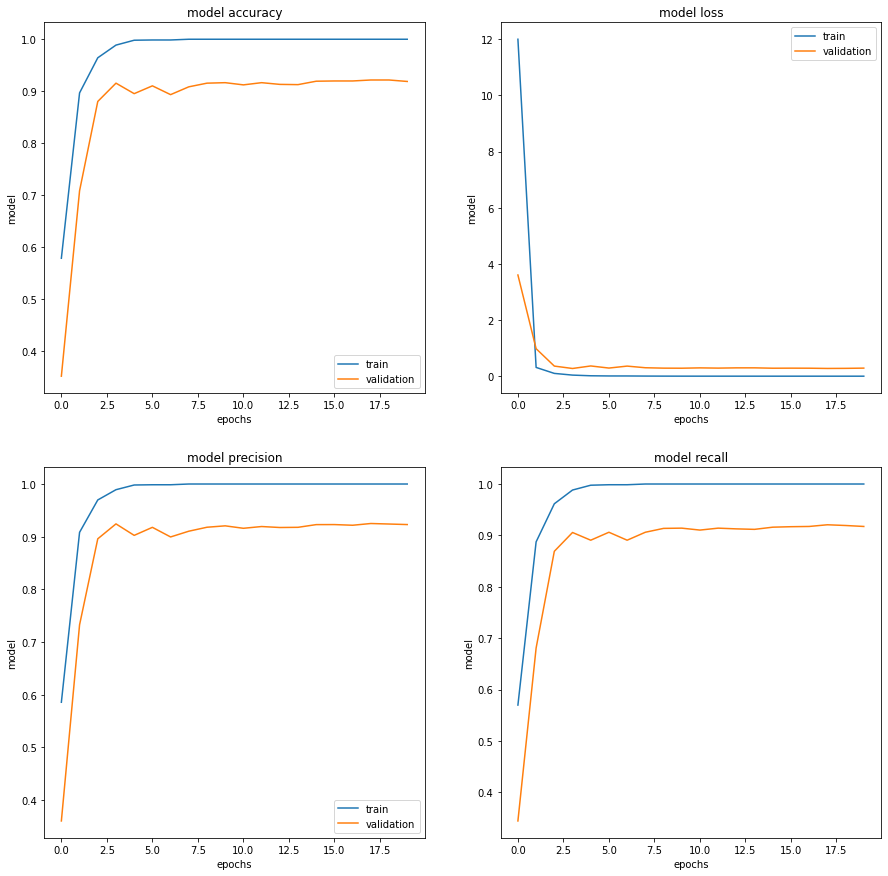

In [ ]:
thrd_f, thrd_axs = plt.subplots(2,2,figsize=(15,15))

thrd_axs[0, 0].plot(thrd_history.history['Accuracy'])
thrd_axs[0, 0].plot(thrd_history.history['val_Accuracy'])
thrd_axs[0, 0].set_title('model accuracy')
thrd_axs[0, 0].legend(['train', 'validation'])


thrd_axs[0, 1].plot(thrd_history.history['loss'])
thrd_axs[0, 1].plot(thrd_history.history['val_loss'])
thrd_axs[0, 1].set_title('model loss')
thrd_axs[0, 1].legend(['train', 'validation'])


thrd_axs[1, 0].plot(thrd_history.history['precision'])
thrd_axs[1, 0].plot(thrd_history.history['val_precision'])
thrd_axs[1, 0].set_title('model precision')
thrd_axs[1, 0].legend(['train', 'validation'])

thrd_axs[1, 1].plot(thrd_history.history['recall'])
thrd_axs[1, 1].plot(thrd_history.history['val_recall'])
thrd_axs[1, 1].set_title('model recall')

for ax in thrd_axs.flat:
    ax.set(xlabel='epochs', ylabel='model')

In [ ]:
fourth_backbone = tf.keras.applications.ResNet50(
        weights='imagenet',
        include_top=False,
        input_shape=(299, 299,3))

for i in range (len(fourth_backbone.layers)-15):
    fourth_backbone.layers[i].trainable = False
    
fourth_resnet_model = Sequential([fourth_backbone, MaxPooling2D(
    pool_size=(4, 4), strides=(2,2), padding="valid"), Flatten(),
                           Dense(128, activation = 'relu'),
                           Dense(8, activation = 'softmax')])
fourth_resnet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 10, 10, 2048)      23587712  
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 2048)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               4194432   
                                                                 
 dense_7 (Dense)             (None, 8)                 1032      
                                                                 
Total params: 27,783,176
Trainable params: 9,715,848
Non-trainable params: 18,067,328
__________________________________

In [ ]:
fourth_resnet_model.compile(optimizer = Adam(learning_rate = 1e-3), loss = 'categorical_crossentropy', metrics = ['Accuracy','Precision', 'Recall'])
fourth_history = fourth_resnet_model.fit(
    x=train_ds,
    validation_data = test_ds,
    batch_size=32,
    epochs=20,
    shuffle=True)

Epoch 1/25
67/67 [==============================] - 62s 850ms/step - loss: 7.9463 - Accuracy: 0.6257 - precision: 0.6311 - recall: 0.6210 - val_loss: 6.3855 - val_Accuracy: 0.3768 - val_precision: 0.3799 - val_recall: 0.3660
Epoch 2/25
67/67 [==============================] - 56s 831ms/step - loss: 0.1949 - Accuracy: 0.9423 - precision: 0.9452 - recall: 0.9390 - val_loss: 0.5070 - val_Accuracy: 0.8508 - val_precision: 0.8589 - val_recall: 0.8400
Epoch 3/25
67/67 [==============================] - 55s 830ms/step - loss: 0.0627 - Accuracy: 0.9784 - precision: 0.9793 - recall: 0.9770 - val_loss: 0.4629 - val_Accuracy: 0.8813 - val_precision: 0.8849 - val_recall: 0.8771
Epoch 4/25
67/67 [==============================] - 56s 833ms/step - loss: 0.0424 - Accuracy: 0.9864 - precision: 0.9882 - recall: 0.9859 - val_loss: 0.5444 - val_Accuracy: 0.8855 - val_precision: 0.8873 - val_recall: 0.8832
Epoch 5/25
67/67 [==============================] - 55s 829ms/step - loss: 0.0129 - Accuracy: 0.9967

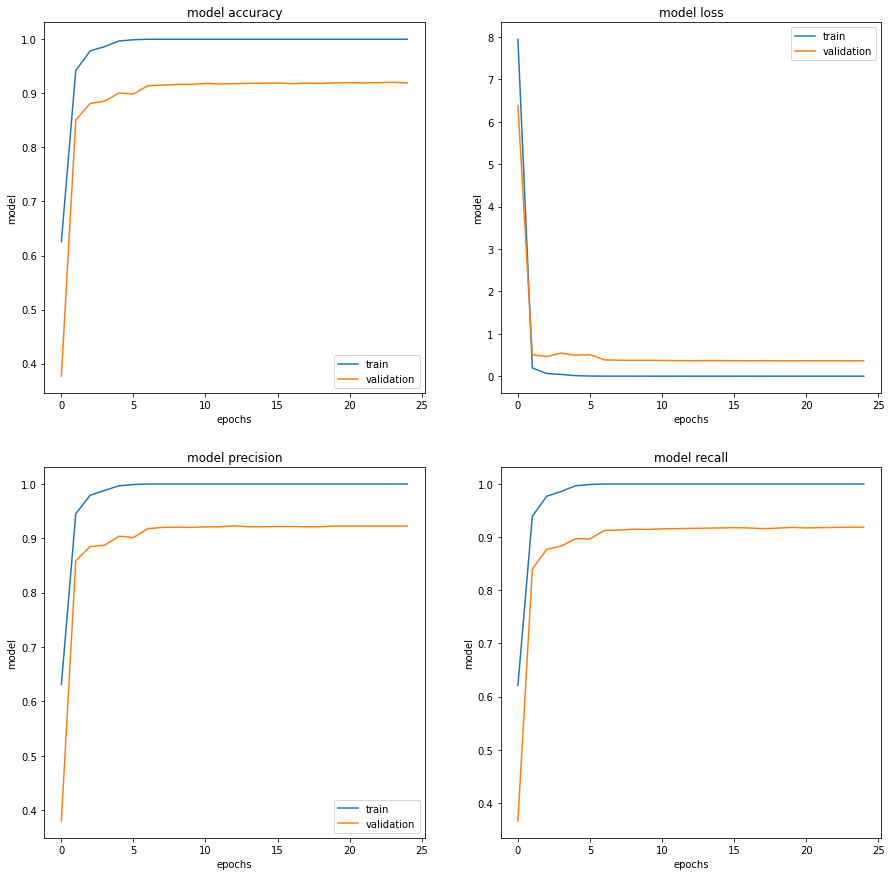

In [ ]:
fourth_f, fourth_axs = plt.subplots(2,2,figsize=(15,15))

fourth_axs[0, 0].plot(fourth_history.history['Accuracy'])
fourth_axs[0, 0].plot(fourth_history.history['val_Accuracy'])
fourth_axs[0, 0].set_title('model accuracy')
fourth_axs[0, 0].legend(['train', 'validation'])


fourth_axs[0, 1].plot(fourth_history.history['loss'])
fourth_axs[0, 1].plot(fourth_history.history['val_loss'])
fourth_axs[0, 1].set_title('model loss')
fourth_axs[0, 1].legend(['train', 'validation'])


fourth_axs[1, 0].plot(fourth_history.history['precision'])
fourth_axs[1, 0].plot(fourth_history.history['val_precision'])
fourth_axs[1, 0].set_title('model precision')
fourth_axs[1, 0].legend(['train', 'validation'])

fourth_axs[1, 1].plot(fourth_history.history['recall'])
fourth_axs[1, 1].plot(fourth_history.history['val_recall'])
fourth_axs[1, 1].set_title('model recall')

for ax in fourth_axs.flat:
    ax.set(xlabel='epochs', ylabel='model')